# <span style='color:Pink'> Accuracy

Accuracy is a fundamental metric used to assess the performance of a classification model. It measures the proportion of correctly classified instances out of the total number of instances in a dataset. In other words, it tells us how often the model's predictions are correct.
 > example:- 
 Imagine you have a dataset with 100 instances, and you apply a classification model to predict the class labels for these instances. The model correctly predicts 85 instances, while it makes mistakes on the remaining 15 instances. The accuracy of the model can be calculated by dividing the number of correctly predicted instances (85) by the total number of instances (100), which gives us an accuracy of 85%.

<b> Confusion matrix

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| Actual Positive| TP                 | FN                 |
| Actual Negative| FP                 | TN                 |

Mathematically, accuracy is defined as:


$ Accuracy = \frac{Correct\_prediction}{Total\_prediction} $
```

This formula calculates the ratio of correct predictions to the total number of predictions made by the model. A higher accuracy means that the model is more reliable and accurate.
```
$Accuracy = (TP + TN) / (TP + TN + FP + FN)$

where:

- TP refers to the number of true positives, i.e., the instances that are correctly predicted as positive.
- TN refers to the number of true negatives, i.e., the instances that are correctly predicted as negative.
- FP refers to the number of false positives, i.e., the instances that are incorrectly predicted as positive when they are actually negative.
- FN refers to the number of false negatives, i.e., the instances that are incorrectly predicted as negative when they are actually positive.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score , precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split 
import numpy as np  

In [3]:
X,y=make_classification(n_samples=1000,n_features=20,n_informative=10,n_classes=2,random_state=32)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=32)

In [10]:
k_value = [i for i in range (1,20,2)]
score=[]
prediction=[]
for k in (k_value):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
    prediction.append(knn.predict(X_test))


In [11]:
score

[0.8766666666666667,
 0.92,
 0.9066666666666666,
 0.9033333333333333,
 0.91,
 0.92,
 0.91,
 0.9166666666666666,
 0.9133333333333333,
 0.92]

In [14]:
for i in prediction:
    accuracy=accuracy_score(i,y_test)
    print(accuracy)

0.8766666666666667
0.92
0.9066666666666666
0.9033333333333333
0.91
0.92
0.91
0.9166666666666666
0.9133333333333333
0.92


In [ ]:
# manual calculation of accuracy 
accuracy_manual = sum(y_pred == y_test) / len(y_test)
print("Accuracy (manual):", accuracy_manual)

#### when accuracy is fail 

Imbalanced Datasets:

In many real-world classification problems, the distribution of classes in the dataset is often imbalanced. This means that one class may have a significantly larger number of instances than the other class. For instance, consider a medical diagnosis task where only a small percentage of patients have a rare disease.

In such cases, a classification model that simply predicts the majority class for all instances can achieve a high accuracy, even though it fails to identify the minority class correctly. This is because the majority class dominates the accuracy calculation. Consequently, accuracy can give a misleading impression of the model's performance, especially when the focus is on correctly identifying the minority class.

consider a dummy dataset with two classes, where Class A has 950 instances and Class B has only 50 instances. We'll create a simple model that predicts the majority class (Class A) for all instances.

In [25]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.8, 0.2], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_metrixs=confusion_matrix(y_test,y_pred)
print("Accuracy:", accuracy)
print("confusion metrix",confusion_metrixs)



Accuracy: 0.9
confusion metrix [[149   3]
 [ 17  31]]


#### mulilevel calssification confusion metrix

In [40]:
from sklearn.datasets import load_iris
from sklearn.metrics import multilabel_confusion_matrix ,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = iris.data
y = iris.target
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Define a range of k values to try
k_values = np.arange(2,round(np.sqrt(len(X_train)),0).astype(int))

# Perform cross-validation for each k value
mean_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    mean_scores.append(scores.mean())

'''# Print the mean scores for each k value
for k, score in zip(k_values, mean_scores):
    print("Mean Accuracy for k =", k, ":", score)'''

# Find the best k value
best_k = k_values[mean_scores.index(max(mean_scores))]
print("Best k value:", best_k)

# Train the final KNN model with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)#use best_k
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('multilevel_confusion_matrix \n',multilabel_confusion_matrix(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))

confusion_metrixs=confusion_matrix(y_test,y_pred)





Best k value: 3
multilevel_confusion_matrix 
 [[[26  0]
  [ 0 19]]

 [[32  0]
  [ 0 13]]

 [[32  0]
  [ 0 13]]]
confusion_matrix [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


multilevel_confusion_matrix 

 [[[26  0]
  [ 0 19]]
  
 [[32  0]

  [ 0 13]]

 [[32  0]

  [ 0 13]]]

  Tn-26 and Tp-19 
  

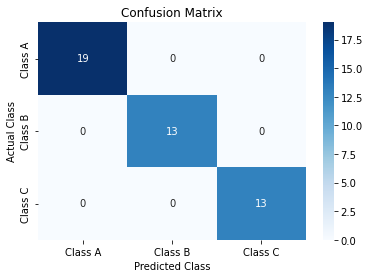

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a heat map using seaborn
sns.heatmap(confusion_metrixs, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Set labels and title
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


# Precision 

Precision is a performance metric that measures the accuracy of positive predictions made by a classification model. It focuses on the proportion of correctly predicted positive instances out of all instances predicted as positive.

> simply understand :-
Precision can be understood as the measure of how "precise" or accurate a model is when it predicts the positive class. It tells us the percentage of positive predictions that are truly positive

Mathematically, precision is defined as the ratio of true positives (TP) to the sum of true positives and false positives (FP):

$ Precision = TP / (TP + FP)$

In [50]:
from sklearn.metrics import precision_score

actual_labels = [1, 0, 0, 1, 1, 1, 0, 1, 0, 1]  # Actual labels
predicted_labels = [1, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Predicted labels

precision = precision_score(actual_labels, predicted_labels,average=None)

print("Precision:", precision)


Precision: 0.8333333333333334


Precision: [0.75       0.83333333] 0.75 is negative of true positve and 0.83 presion of Positive

In [47]:
from sklearn.metrics import precision_score,confusion_matrix
# dummie levels 
actual_labels = [1, 2, 1, 1, 3, 2, 1, 3, 2, 3]  # Actual labels
predicted_labels = [1, 2, 1, 1, 3, 1, 2, 2, 2, 3]  # Predicted labels

precision = precision_score(actual_labels, predicted_labels, average=None)
precision1 = precision_score(actual_labels, predicted_labels, average='macro')
print(confusion_matrix(actual_labels,predicted_labels))
print("Precision for Each Class:", precision)
print("Precision for Each Class:", precision1)

[[3 1 0]
 [1 2 0]
 [0 1 2]]
Precision for Each Class: [0.75 0.5  1.  ]
Precision for Each Class: 0.75


# different average method 


In [70]:
from sklearn.metrics import confusion_matrix,precision_score
y_true = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                   3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

y_pred = np.array([1, 1, 1, 1, 1, 2, 2, 2, 2, 3,
                   1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                   3, 3, 3, 3, 3, 3, 3, 3, 3, 2])

# Calculate the confusion matrix
cm =confusion_matrix(y_true, y_pred, labels=[1, 2, 3])

In [67]:
cm

array([[5, 4, 1],
       [1, 9, 0],
       [0, 1, 9]], dtype=int64)

In [73]:
#none
precision_score(y_true,y_pred,average=None)

array([0.83333333, 0.64285714, 0.9       ])

In [74]:
#micro
precision_score(y_true,y_pred,average='micro')


0.7666666666666667

In [75]:
#macro
precision_score(y_true,y_pred,average='macro')

0.792063492063492

In [78]:
#weighted
precision_score(y_true,y_pred,average='weighted')

0.7920634920634921

| Average Type | Use Case |
| ------------ | -------- |
| Macro Average | Use when you want to give equal importance to each class. |
| Micro Average | Use when you want to emphasize the overall performance of the model. |
| Weighted Average | Use when you want to consider class imbalance and give more weight to classes with more instances. |

# Recall 

Recall, also known as sensitivity or true positive rate, is a performance metric that measures the ability of a classifier to identify all positive instances correctly. It focuses on the proportion of actual positive instances that are correctly identified by the model.